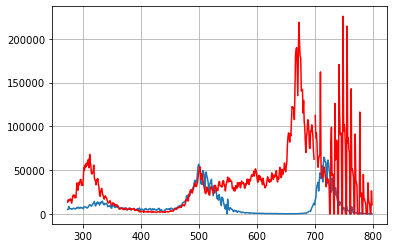

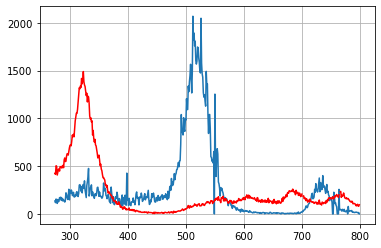

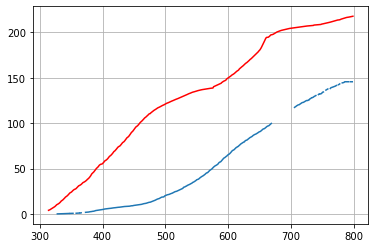

In [34]:
#Read data csv from:
#https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#reading data from file
df = pd.read_csv('covid.csv')

#Screening columns, data head and certain data location
#print(df.columns)
#print(df.head())
#print(df.loc[30000,:])

#Selecting certain country in data columns
df1 = df.loc[df['location'] == 'Indonesia']
#df1=df1[['location','date','new_cases','new_deaths','new_vaccinations','stringency_index','new_cases_smoothed','new_deaths_smoothed']]
#print(df1.tail())
df2 = df.loc[df['location'] == 'United Kingdom']
#df2=df2[['location','date','new_cases','new_deaths','new_vaccinations','stringency_index','new_cases_smoothed','new_deaths_smoothed']]
#print(df2.loc[df2['date'] == '2021-03-15'])
#print(df2.tail())

#Reseting data index
df1.reset_index(drop=True, inplace=True)
df2.reset_index(drop=True, inplace=True)
#print(df1.tail())

#Trimming data to the same length
#print(df2)
#print(len(df2) - len(df1))
df2=df2.iloc[len(df2) - len(df1):]
df2.reset_index(drop=True, inplace=True)
#print(df2.tail())

#Setting the last XX days data, 720 = 24 months
df1=df1.iloc[len(df1)-720:800]
df2=df2.iloc[len(df2)-720:800]
#print(df1)
#print(df2)

plt.plot(df1['new_cases'])
plt.plot(df2['new_cases'],'r')
plt.grid()
plt.show()
plt.plot(df1['new_deaths'])
plt.plot(df2['new_deaths'],'r')
plt.grid()
plt.show()
plt.plot(df1['total_vaccinations_per_hundred'])
plt.plot(df2['total_vaccinations_per_hundred'],'r')
plt.grid()

In [35]:
#Selecting certain parameters for prediction
df3=df1[['new_cases','new_deaths']]
print(df3.shape)
print(df3.head())

df3=df3.dropna()
df3.reset_index(drop=True, inplace=True)
print(df3.shape)
print(df3.head())

(526, 2)
     new_cases  new_deaths
274     5092.0       136.0
275     5533.0       118.0
276     8369.0       156.0
277     5803.0       124.0
278     6027.0       110.0
(526, 2)
   new_cases  new_deaths
0     5092.0       136.0
1     5533.0       118.0
2     8369.0       156.0
3     5803.0       124.0
4     6027.0       110.0


0.7217817907645963
[[0.03289177]]
[13.13579672]
174


-32.29990533892941

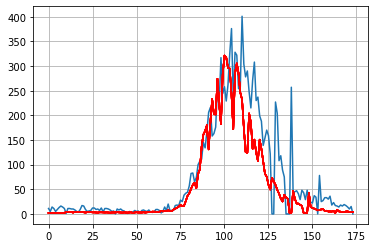

In [37]:
from sklearn.model_selection import train_test_split

x=df3[['new_cases']].values
y=df3[['new_deaths']].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42, shuffle=False)

#print(x[0:5])
#print(y[0:5])
#print(y_test[0:5])

from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train, y_train)
print(reg.score(x_train, y_train))
print(reg.coef_)
print(reg.intercept_)

y_pred=reg.predict(x_test)
#assume deaths number will be delayed by 14 days and delta is 2x more deadly than previous data
y_predpad=np.pad(0.15*y_pred[0:len(y_pred)-10],(10,0),'minimum')

plt.plot(y_test)
plt.plot(y_predpad,'r')
plt.grid()
print(len(y_pred))

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)
#r2_score(y_test, y_predpad(0:len(y_pred))

In [13]:
#Selecting certain parameters for prediction
df3=df1[['new_cases','new_vaccinations','stringency_index','new_tests','new_deaths']]
print(df3.shape)
print(df3.head())

df3=df3.dropna()
df3.reset_index(drop=True, inplace=True)
print(df3.shape)
print(df3.head())

(526, 5)
     new_cases  new_vaccinations  stringency_index  new_tests  new_deaths
274     5092.0               NaN             64.35        NaN       136.0
275     5533.0               NaN             64.35        NaN       118.0
276     8369.0               NaN             64.35        NaN       156.0
277     5803.0               NaN             64.35        NaN       124.0
278     6027.0               NaN             64.35        NaN       110.0
(322, 5)
   new_cases  new_vaccinations  stringency_index  new_tests  new_deaths
0     5414.0          446052.0             71.76    47064.0       180.0
1     6825.0          395688.0             71.76    58752.0       162.0
2     6570.0          205895.0             71.76    35943.0       227.0
3     6279.0          240180.0             71.76    45963.0       197.0
4     5656.0          318685.0             71.76    43807.0       108.0


0.39822997280709616
[[ 2.42599339e+03 -6.81182763e-03  1.97443455e-01]]
[-173258.68650009]
107


0.42119609019113935

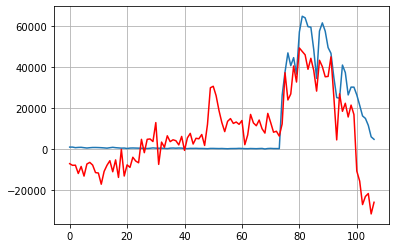

In [20]:
from sklearn.model_selection import train_test_split

x=df3[['stringency_index','new_vaccinations','new_tests']].values
y=df3[['new_cases']].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42, shuffle=False)

#print(x[0:5])
#print(y[0:5])
#print(y_test[0:5])

from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train, y_train)
print(reg.score(x_train, y_train))
print(reg.coef_)
print(reg.intercept_)

y_pred=reg.predict(x_test)

plt.plot(y_test)
plt.plot(y_pred,'r')
plt.grid()
print(len(y_pred))

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

65


-0.6518512434498069

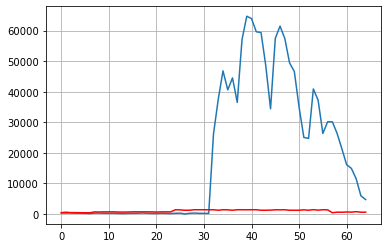

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

x=df3[['new_vaccinations','new_tests','stringency_index']].values
y=df3[['new_cases']].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=False)

forest_reg = RandomForestRegressor(n_estimators=100, random_state=0, max_depth=5)
forest_reg.fit(x_train, np.ravel(y_train))

y_pred=forest_reg.predict(x_test)

plt.plot(y_test)
plt.plot(y_pred,'r')
plt.grid()

print(len(y_pred))

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)